In [3]:
import pandas as pd
import spacy
from tqdm import tqdm
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [11]:
# Cargar el modelo de spaCy en español
nlp = spacy.load("es_core_news_md")

# Leer el CSV
df = pd.read_csv("../../data/dataset_completo_Cleaned.csv")# Reemplaza con la ruta real

tqdm.pandas(desc="Procesando texto")

# Combinar todos los textos de la columna 'postText'
text = " ".join(df['postText'].dropna().astype(str).tolist())

# Procesar con spaCy
doc = nlp(text.lower())

# Extraer lemas, ignorar palabras vacías y signos de puntuación
tokens = [token.lemma_ for token in doc if token.is_alpha and not token.is_stop]

# Extraer oraciones
oraciones = [sent.text.strip() for sent in doc.sents]

# --- FILTRO MEJORADO PARA LAS FRASES NOMINALES ---
def oracion_valida(oracion):
    palabras = oracion.split()
    if len(palabras) < 2:
        return False
    if any(char in oracion for char in "#*@$%^&()[]{}<>1234567890\"'"):
        return False
    return True

oraciones_filtradas = [o for o in oraciones if oracion_valida(o)]

In [ ]:
# Contar frecuencia
frecuencia = Counter(tokens)
frecuencia_oraciones = Counter(oraciones_filtradas)

# Mostrar las 10 palabras más frecuentes
print("Palabras más comunes:")
for palabra, freq in frecuencia.most_common(10):
    print(f"{palabra}: {freq}")

# Mostrar las 10 frases nominales más frecuentes
print("\nFrases completas más frecuentes:")
for oracion, freq in frecuencia_oraciones.most_common(10):
    print(f"{oracion}: {freq}")

Palabras más comunes:
uis: 241
hola: 142
alguien: 134
trabajo: 107
informacion: 106
buscar: 99
grado: 96
proyecto: 95
whatsapp: 91
habitacion: 87

Frases completas más frecuentes:
somos expertos en acompanarte en cada etapa de tu formacion universitaria.: 9
para apoyarte en todas tus actividades academicas. 

escribenos y cotiza con nosotros.: 5
te ofrecemos asesoria personalizada y elaboracion de proyectos academicos hechos a tu medida.: 5
contamos con profes en todas las materias para que no te pase esto.: 4
necesitas ayuda con tu tesis o proyecto de grado? 

!no estas solo!: 4
tambien puedo ayudarte con la creacion de diapositivas, resumenes y articulos de investigacion.: 4
!no te preocupes!.: 3
necesitas ayuda con tu tesis o proyecto de grado? 

!no estas solo! te ofrecemos asesoria personalizada y elaboracion de proyectos academicos hechos a tu medida.: 3
ambiente no familiar.: 3
!te esperamos!: 3


C:\Users\Migue\AppData\Local\Temp\ipykernel_12876\4051633907.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y=ylabel, data=df_freq, palette=colores_verde_gris[:n])


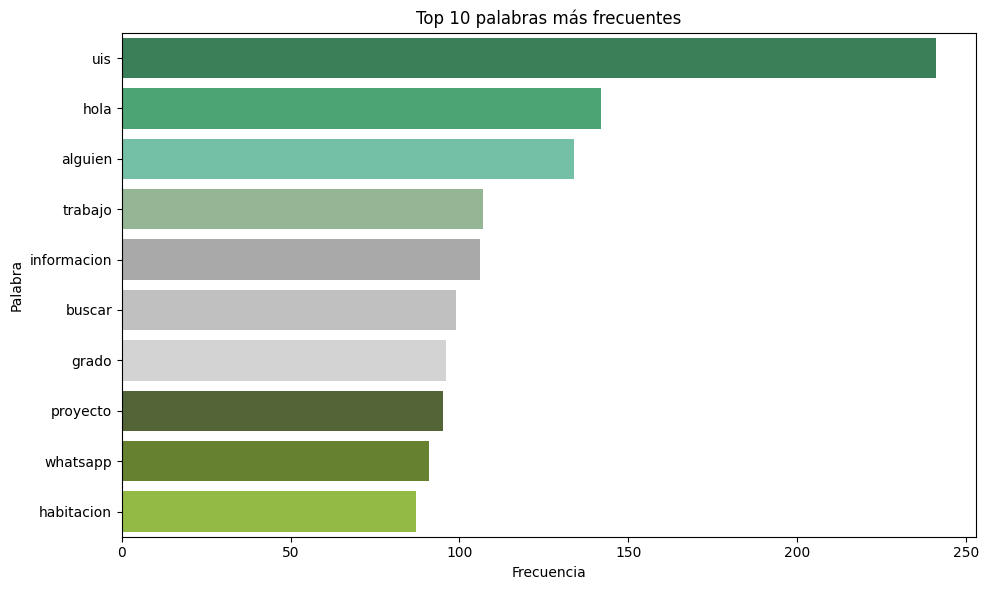

C:\Users\Migue\AppData\Local\Temp\ipykernel_12876\4051633907.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frecuencia', y=ylabel, data=df_freq, palette=colores_verde_gris[:n])
) missing from font(s) DejaVu Sans.pykernel_12876\4051633907.py:25: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from font(s) DejaVu Sans.Proyecto HANDS\env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


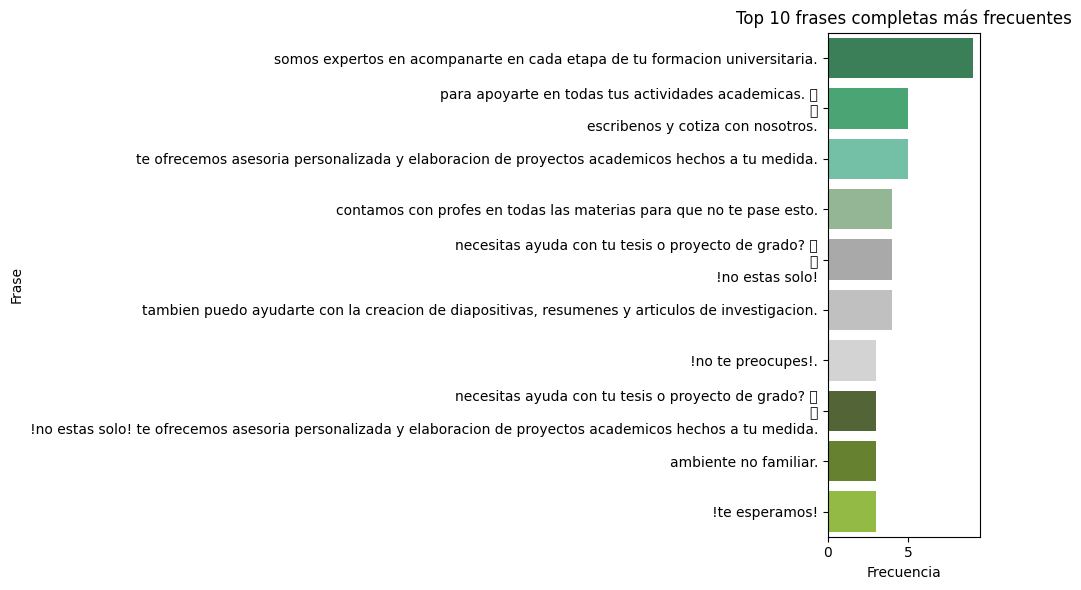

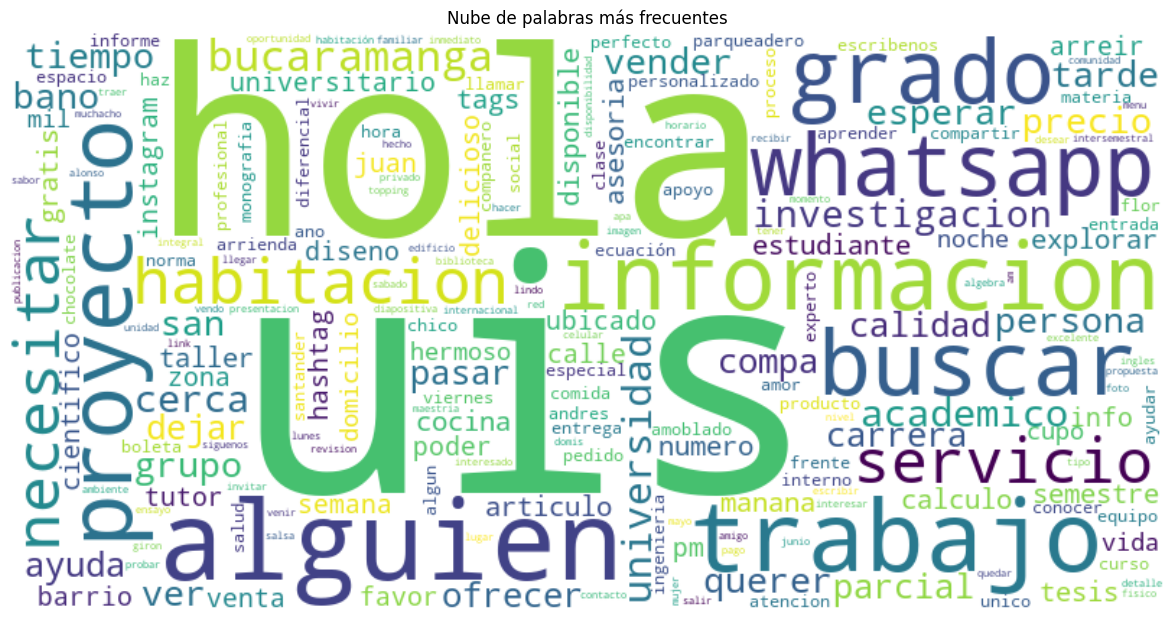

In [13]:
# ---- Gráficos ----
colores_verde_gris = [
    '#2e8b57',  # sea green
    '#3cb371',  # medium sea green
    '#66cdaa',  # medium aquamarine
    '#8fbc8f',  # dark sea green
    '#a9a9a9',  # dark gray
    '#c0c0c0',  # silver
    '#d3d3d3',  # light gray
    '#556b2f',  # dark olive green
    '#6b8e23',  # olive drab
    '#9acd32'   # yellow green
]
# Función para graficar barras (palabras o frases)
def graficar_barras(frecuencia, titulo, xlabel, ylabel, n=10):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    df_freq = pd.DataFrame(frecuencia.most_common(n), columns=[ylabel, 'Frecuencia'])
    plt.figure(figsize=(10,6))
    sns.barplot(x='Frecuencia', y=ylabel, data=df_freq, palette=colores_verde_gris[:n])
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# Graficar palabras
graficar_barras(frecuencia, 'Top 10 palabras más frecuentes', 'Frecuencia', 'Palabra')

# Graficar oraciones
graficar_barras(frecuencia_oraciones, 'Top 10 frases completas más frecuentes', 'Frecuencia', 'Frase')

# Función para nube de palabras
def mostrar_nube_palabras(frecuencia, titulo):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia)
    plt.figure(figsize=(15,7.5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(titulo)
    plt.show()

# Nube de palabras
mostrar_nube_palabras(frecuencia, 'Nube de palabras más frecuentes')